In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
def categorical_bar_plus(df, target, figsize=(700, 550)):
    # Hacerlo simple o con color
    grouped = df.groupby(target)
    freq_df = grouped.count().reset_index()
    if type(target) is list:
        barmode = 'relative'
        freq_df = freq_df[freq_df.columns[:3]].rename(columns={f"{freq_df.columns[2]}": "Count"}).sort_values(by=['Count'], ascending=False)
        fig = go.Figure()
        for label in np.unique(freq_df[target[1]]):
            fig.add_bar(
                x=freq_df.loc[freq_df[target[1]] == label][target[0]],
                y=freq_df.loc[freq_df[target[1]] == label]['Count'],
                name=str(label),
            )
    else:
        barmode = 'stack'
        freq_df = freq_df[freq_df.columns[:2]].rename(columns={f"{freq_df.columns[1]}": "Count"}).sort_values(by=['Count'], ascending=False)
        fig = go.Figure()
        fig.add_trace(
            go.Bar(
                x=freq_df[target], 
                y=freq_df['Count'],
            )
        )        
    fig.update_layout(
        barmode=barmode,
        height = figsize[1],
        width = figsize[0],
        margin=dict(
            t=20,
            l=20,
            r=20,
            b=20),        
    )
    return fig

In [3]:
alteration_raw = pd.read_csv('Alteration.csv')
assay_raw = pd.read_csv('Assay.csv')
collar_raw = pd.read_csv('Collar.csv')
density_raw = pd.read_csv('Dry bulk density.csv')
litologia_raw = pd.read_csv('Lithology.csv')
mineralizacion_raw = pd.read_csv('Mineralisation.csv')
survey_raw = pd.read_csv('Survey.csv')

## Vista base de datos `Alteration`

In [4]:
alteration_raw.head()

HOLEID  GEOLFROM  GEOLTO MALT_D
0  OTD1417    1127.8  1131.2    AAA
1  OTD1417    1132.4  1176.0    PHY
2  OTD1726     200.5   219.7    UAL
3  OTD1726     226.8   248.1    UAL
4  OTD1726     248.1   311.3    PRO

## Informacion respecto a las variables

In [5]:
alteration_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HOLEID    3099 non-null   object 
 1   GEOLFROM  3099 non-null   float64
 2   GEOLTO    3099 non-null   float64
 3   MALT_D    3099 non-null   object 
dtypes: float64(2), object(2)
memory usage: 97.0+ KB


## Análisis estadístico inicial

In [6]:
alteration_raw.describe(include='all').T

count unique      top freq        mean         std   min      25%  \
HOLEID      3099    215  OTD1901  134         NaN         NaN   NaN      NaN   
GEOLFROM  3099.0    NaN      NaN  NaN  467.346818  392.184644   0.0  147.675   
GEOLTO    3099.0    NaN      NaN  NaN   493.22768  395.208191  0.08   167.05   
MALT_D      3099      9      UAL  884         NaN         NaN   NaN      NaN   

            50%    75%     max  
HOLEID      NaN    NaN     NaN  
GEOLFROM  370.0  705.0  1995.7  
GEOLTO    398.3  750.0  2010.3  
MALT_D      NaN    NaN     NaN

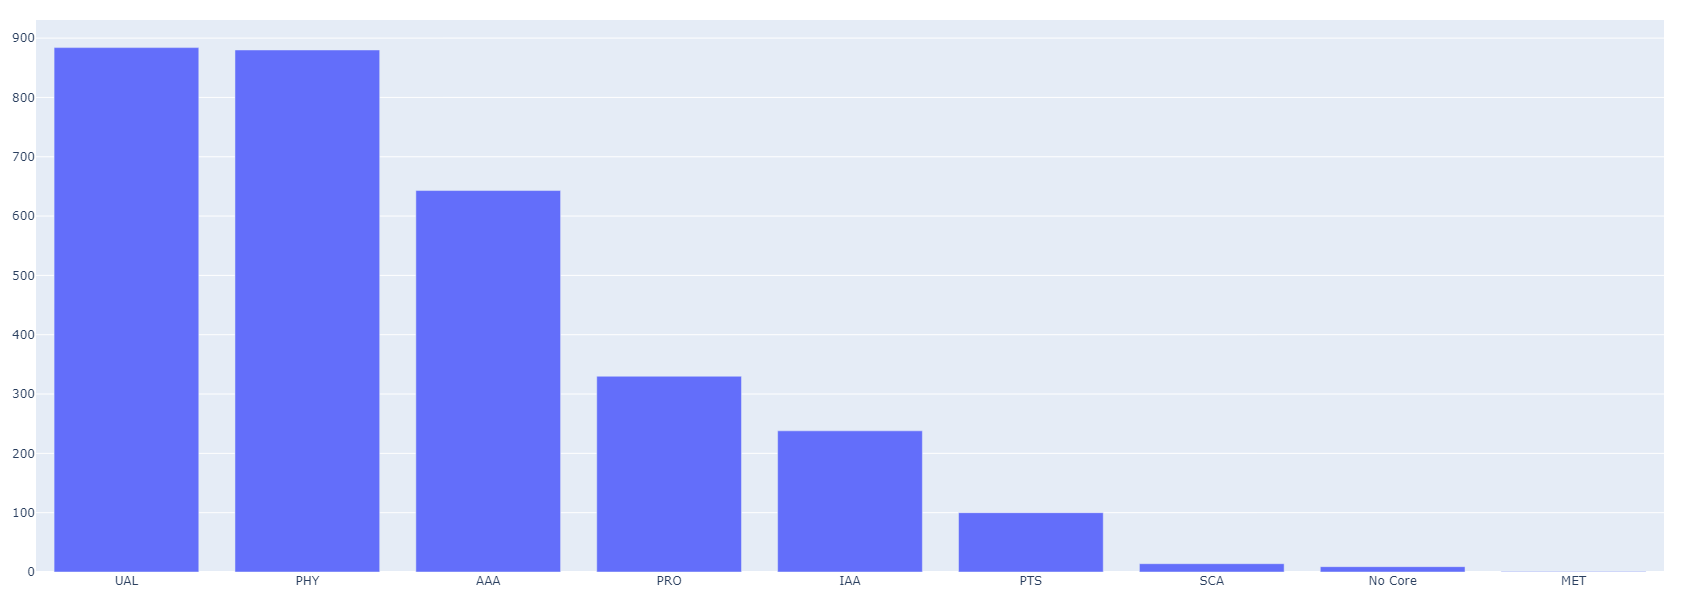

In [7]:
categorical_bar_plus(df=alteration_raw, target='MALT_D', figsize=(1000, 600))

In [8]:
alteration = alteration_raw.copy()
alteration['Largo'] = alteration['GEOLTO'] - alteration['GEOLFROM']

In [9]:
mapeado_drill = [alteration[(alteration['HOLEID'] == h)]['Largo'].sum() for h in alteration.HOLEID.unique()]
total_drill = np.array([collar_raw.loc[collar_raw.HOLEID == h, 'DEPTH'].values[0] for h in alteration.HOLEID.unique()])

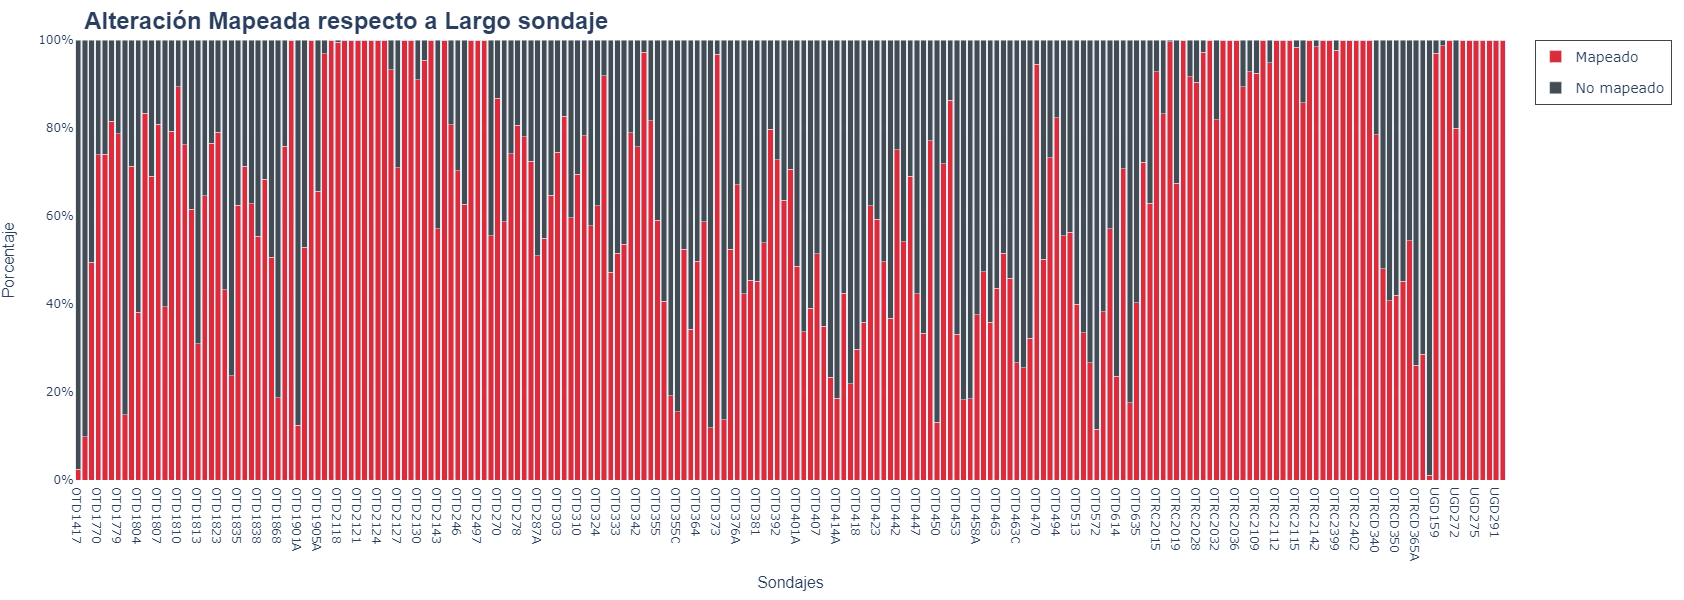

In [10]:
fig = go.Figure()
fig.add_trace(go.Bar(x=alteration.HOLEID.unique(), y=np.round((mapeado_drill/total_drill)*100, 2), legendgroup="Mapeado", name='Mapeado', marker_color='#db2c3c', marker_opacity=1.0))
fig.add_trace(go.Bar(x=alteration.HOLEID.unique(), y=np.round((total_drill-mapeado_drill)*100/total_drill, 2), legendgroup="No mapeado", name='No mapeado', marker_color='#434b53', marker_opacity=1.0))
fig.update_layout(
    legend = {
        'font': {
            'size': 14
        },
        'borderwidth':1
    },
    title={
        "text": "<b>Alteración Mapeada respecto a Largo sondaje</b>",
        "font": {
            "family": "Helvetica",
            "size": 24,
        },
        'y': 0.98
    },
    xaxis={
        'title': {
            'text': f"Sondajes",
            'font': {
                "family": "Helvetica",
                'size': 16,
            }
        },
    },
    yaxis={
        'title': {
            'text': 'Porcentaje',
            'font': {
                "family": "Helvetica",
                'size': 16,
            }
        },
        'ticksuffix': '%',
        'range': [0, 100]
    },
    barmode='stack',
    height = 600,
    width = 1650,
    margin=dict(
            t=40,
            l=20,
            r=20,
            b=20)
)
fig.show()

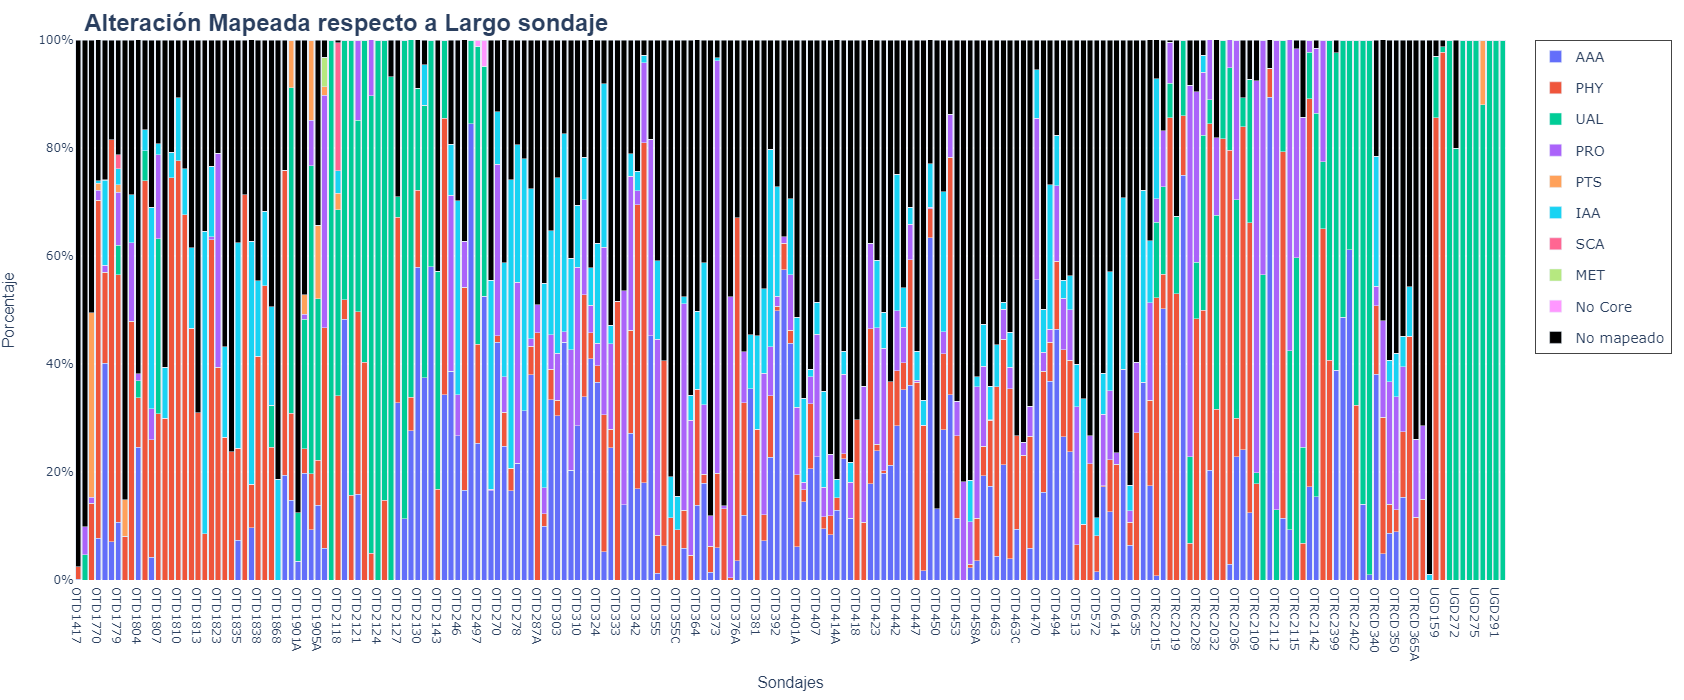

In [11]:
fig = go.Figure()
for alt in alteration.MALT_D.unique():
    malt = [alteration[(alteration['HOLEID'] == h) & (alteration['MALT_D'] == alt)]['Largo'].sum() for h in alteration.HOLEID.unique()]
    fig.add_trace(go.Bar(x=alteration.HOLEID.unique(), y=np.round((malt/total_drill)*100, 2), legendgroup=f"{alt}", name=f'{alt}'))
fig.add_trace(go.Bar(x=alteration.HOLEID.unique(), y=np.round((total_drill-mapeado_drill)*100/total_drill, 2), legendgroup="No mapeado", name='No mapeado', marker_color='black', marker_opacity=1.0))
fig.update_layout(
    legend = {
        'font': {
            'size': 14
        },
        'borderwidth':1
    },
    title={
        "text": "<b>Alteración Mapeada respecto a Largo sondaje</b>",
        "font": {
            "family": "Helvetica",
            "size": 24,
        },
        'y': 0.98
    },
    xaxis={
        'title': {
            'text': f"Sondajes",
            'font': {
                "family": "Helvetica",
                'size': 16,
            }
        },
    },
    yaxis={
        'title': {
            'text': 'Porcentaje',
            'font': {
                "family": "Helvetica",
                'size': 16,
            }
        },
        'ticksuffix': '%',
        'range': [0, 100]
    },
    barmode='stack',
    height = 700,
    width = 1650,
    margin=dict(
            t=40,
            l=20,
            r=20,
            b=20)
)
fig.show()

## Vista base de datos `Density`

In [12]:
density_raw.head()

HOLEID  GEOLFROM  GEOLTO  BulkDensity
0  OTD1155       6.7     6.8         2.07
1  OTD1155      12.9    13.0         2.14
2  OTD1155      21.7    21.8         2.66
3  OTD1155      35.3    35.4         2.67
4  OTD1155      44.2    44.3         2.67

## Informacion respecto a las variables

In [13]:
density_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10838 entries, 0 to 10837
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HOLEID       10838 non-null  object 
 1   GEOLFROM     10838 non-null  float64
 2   GEOLTO       10838 non-null  float64
 3   BulkDensity  10838 non-null  float64
dtypes: float64(3), object(1)
memory usage: 338.8+ KB


## Análisis estadístico inicial

In [14]:
density_raw.describe().T

count        mean         std   min    25%     50%       75%  \
GEOLFROM     10838.0  478.601722  323.862103  1.10  214.0  440.25  685.9875   
GEOLTO       10838.0  478.710985  323.863080  1.20  214.1  440.40  686.0875   
BulkDensity  10838.0    2.754331    0.137719  1.63    2.7    2.75    2.8100   

                 max  
GEOLFROM     2000.60  
GEOLTO       2000.80  
BulkDensity     4.42

In [15]:
density = density_raw.copy()
density['Largo'] = density['GEOLTO'] - density['GEOLFROM']

In [16]:
mapeado_drill = [density[(density['HOLEID'] == h)]['Largo'].sum() for h in density.HOLEID.unique()]
total_drill = np.array([collar_raw.loc[collar_raw.HOLEID == h, 'DEPTH'].values[0] for h in density.HOLEID.unique()])

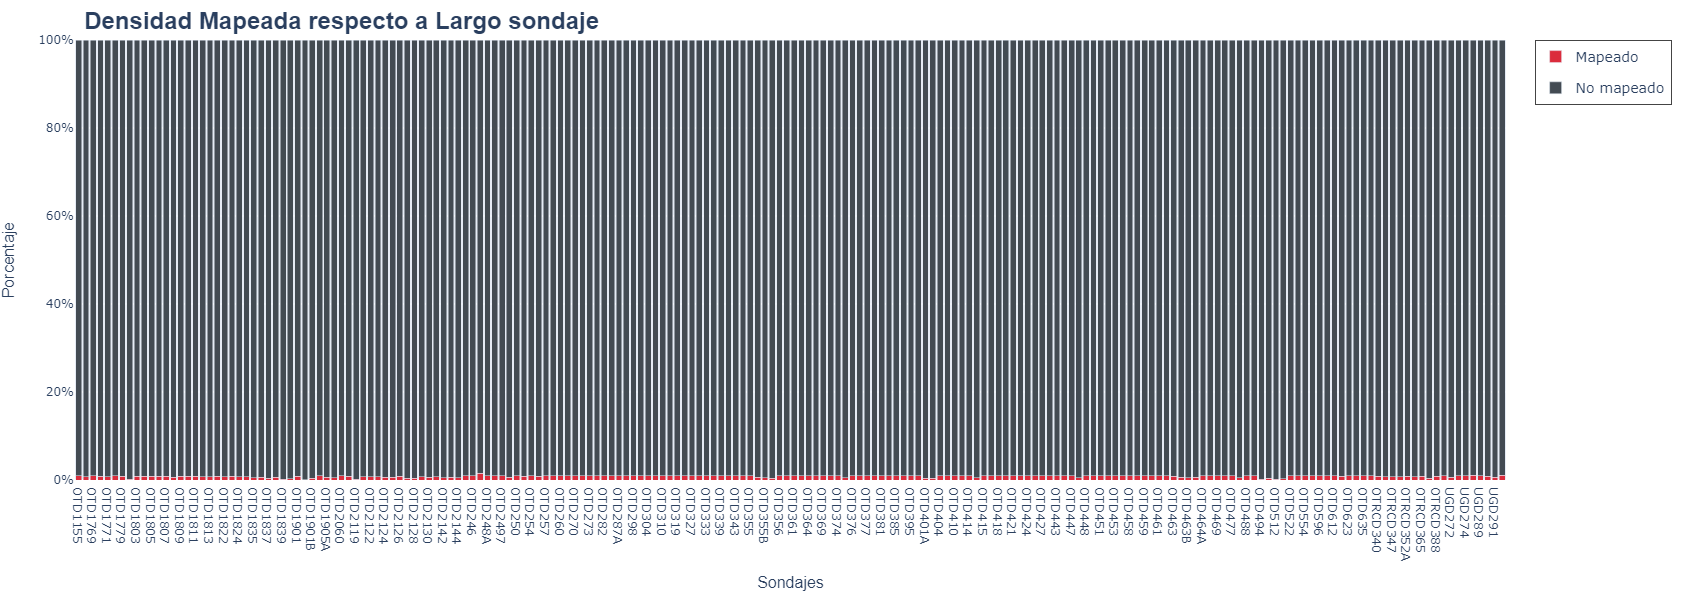

In [17]:
fig = go.Figure()
fig.add_trace(go.Bar(x=density.HOLEID.unique(), y=np.round((mapeado_drill/total_drill)*100, 2), legendgroup="Mapeado", name='Mapeado', marker_color='#db2c3c', marker_opacity=1.0))
fig.add_trace(go.Bar(x=density.HOLEID.unique(), y=np.round((total_drill-mapeado_drill)*100/total_drill, 2), legendgroup="No mapeado", name='No mapeado', marker_color='#434b53', marker_opacity=1.0))
fig.update_layout(
    legend = {
        'font': {
            'size': 14
        },
        'borderwidth':1
    },
    title={
        "text": "<b>Densidad Mapeada respecto a Largo sondaje</b>",
        "font": {
            "family": "Helvetica",
            "size": 24,
        },
        'y': 0.98
    },
    xaxis={
        'title': {
            'text': f"Sondajes",
            'font': {
                "family": "Helvetica",
                'size': 16,
            }
        },
    },
    yaxis={
        'title': {
            'text': 'Porcentaje',
            'font': {
                "family": "Helvetica",
                'size': 16,
            }
        },
        'ticksuffix': '%',
        'range': [0, 100]
    },
    barmode='stack',
    height = 600,
    width = 1650,
    margin=dict(
            t=40,
            l=20,
            r=20,
            b=20)
)
fig.show()

## Vista base de datos `Litología`

In [18]:
litologia_raw.head()

holeid  from    to mlith
0  OTD002   0.0  13.8  CLAY
1  OTD002  13.8  30.0   AND
2  OTD002  30.0  53.0   IGN
3  OTD002  53.0  65.8   QMD
4  OTD002  65.8  79.7   HBX

## Informacion respecto a las variables

In [19]:
litologia_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14849 entries, 0 to 14848
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   holeid  14849 non-null  object 
 1   from    14849 non-null  float64
 2   to      14849 non-null  float64
 3   mlith   14849 non-null  object 
dtypes: float64(2), object(2)
memory usage: 464.2+ KB


## Análisis estadístico inicial

In [20]:
litologia_raw.describe(include='all').T

count unique      top  freq        mean         std   min    25%  \
holeid    14849    360  OTD1770   206         NaN         NaN   NaN    NaN   
from    14849.0    NaN      NaN   NaN  496.348503   375.60896   0.0  175.1   
to      14849.0    NaN      NaN   NaN  507.464672  374.207285  0.08  188.7   
mlith     14849     14      QMD  3221         NaN         NaN   NaN    NaN   

           50%    75%     max  
holeid     NaN    NaN     NaN  
from    447.15  738.8  2010.3  
to       458.2  749.5  2011.0  
mlith      NaN    NaN     NaN

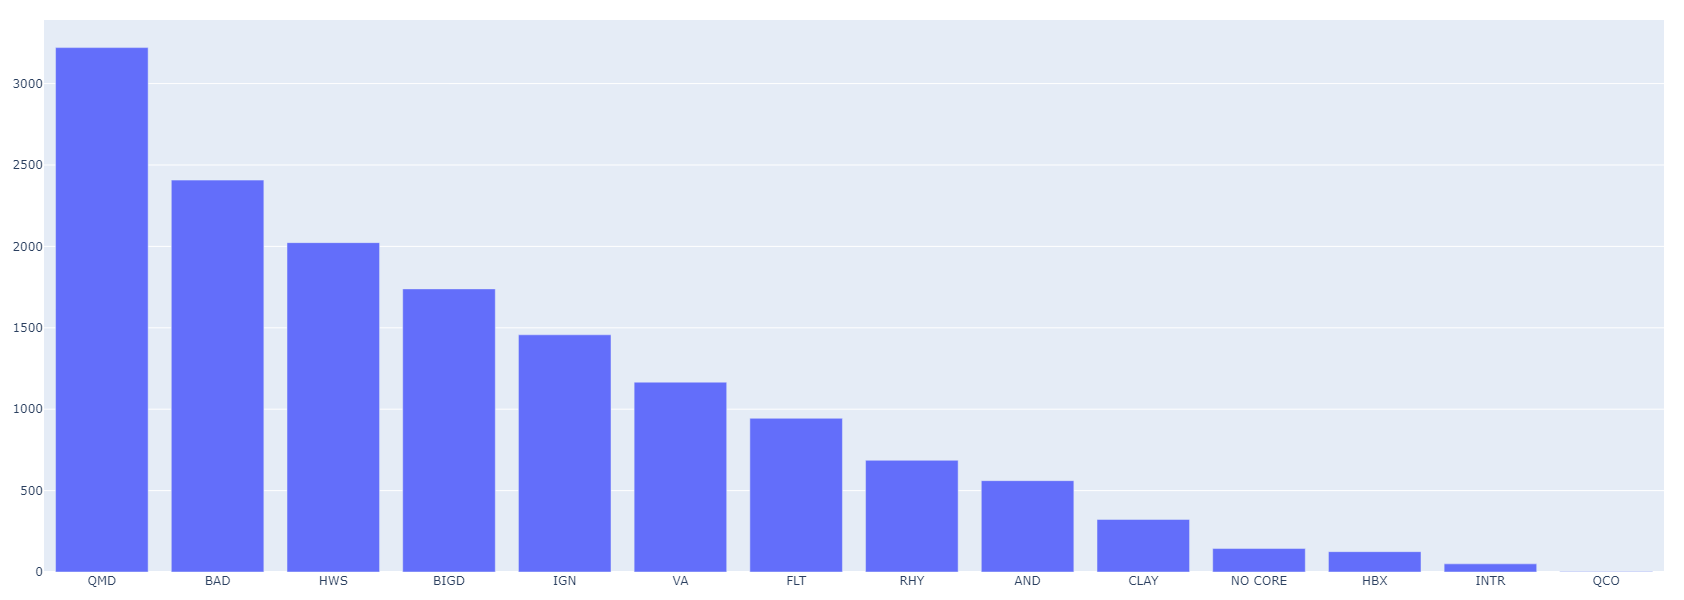

In [21]:
categorical_bar_plus(df=litologia_raw, target='mlith', figsize=(1000, 600))

In [22]:
litologia = litologia_raw.copy()
litologia['Largo'] = litologia['to'] - litologia['from']

In [23]:
mapeado_drill = [litologia[(litologia['holeid'] == h)]['Largo'].sum() for h in litologia.holeid.unique()]
total_drill = np.array([collar_raw.loc[collar_raw.HOLEID == h, 'DEPTH'].values[0] for h in litologia.holeid.unique()])

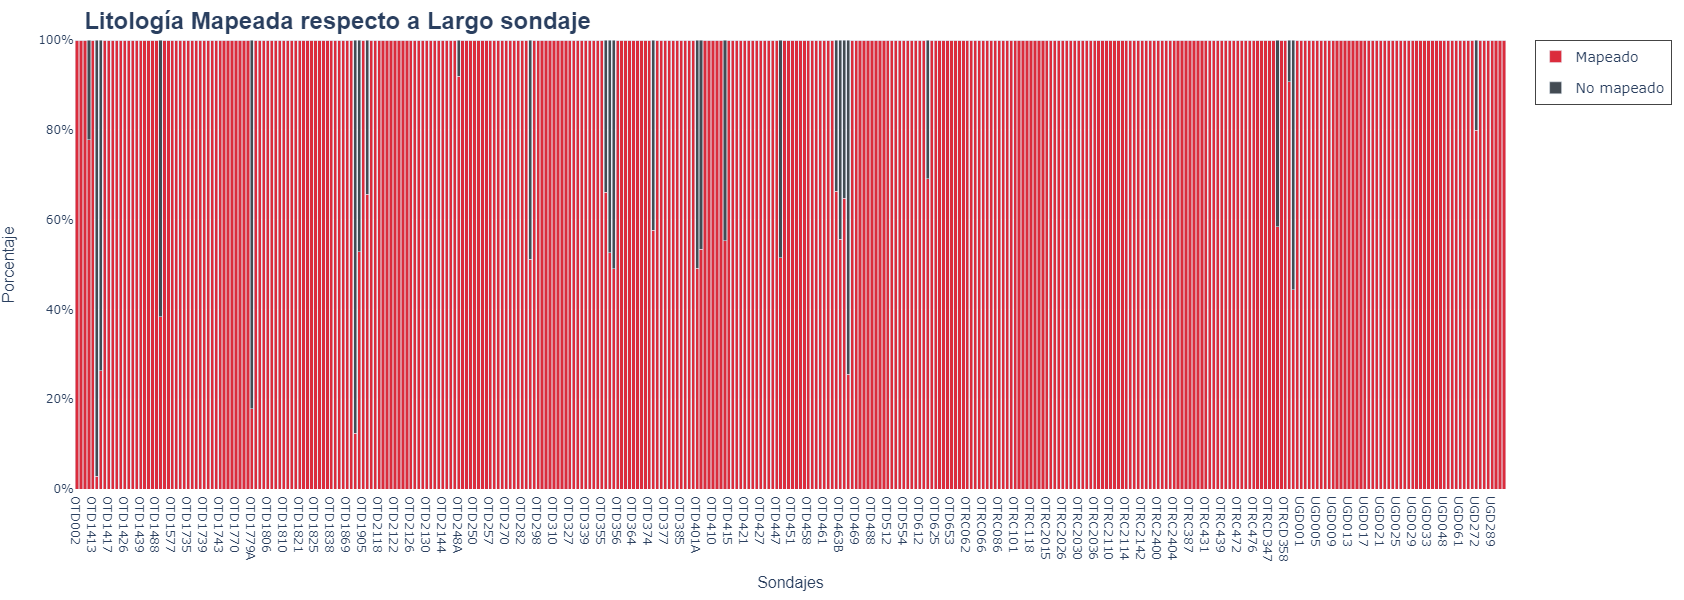

In [24]:
fig = go.Figure()
fig.add_trace(go.Bar(x=litologia.holeid.unique(), y=np.round((mapeado_drill/total_drill)*100, 2), legendgroup="Mapeado", name='Mapeado', marker_color='#db2c3c', marker_opacity=1.0))
fig.add_trace(go.Bar(x=litologia.holeid.unique(), y=np.round((total_drill-mapeado_drill)*100/total_drill, 2), legendgroup="No mapeado", name='No mapeado', marker_color='#434b53', marker_opacity=1.0))
fig.update_layout(
    legend = {
        'font': {
            'size': 14
        },
        'borderwidth':1
    },
    title={
        "text": "<b>Litología Mapeada respecto a Largo sondaje</b>",
        "font": {
            "family": "Helvetica",
            "size": 24,
        },
        'y': 0.98
    },
    xaxis={
        'title': {
            'text': f"Sondajes",
            'font': {
                "family": "Helvetica",
                'size': 16,
            }
        },
    },
    yaxis={
        'title': {
            'text': 'Porcentaje',
            'font': {
                "family": "Helvetica",
                'size': 16,
            }
        },
        'ticksuffix': '%',
        'range': [0, 100]
    },
    barmode='stack',
    height = 600,
    width = 1650,
    margin=dict(
            t=40,
            l=20,
            r=20,
            b=20)
)
fig.show()

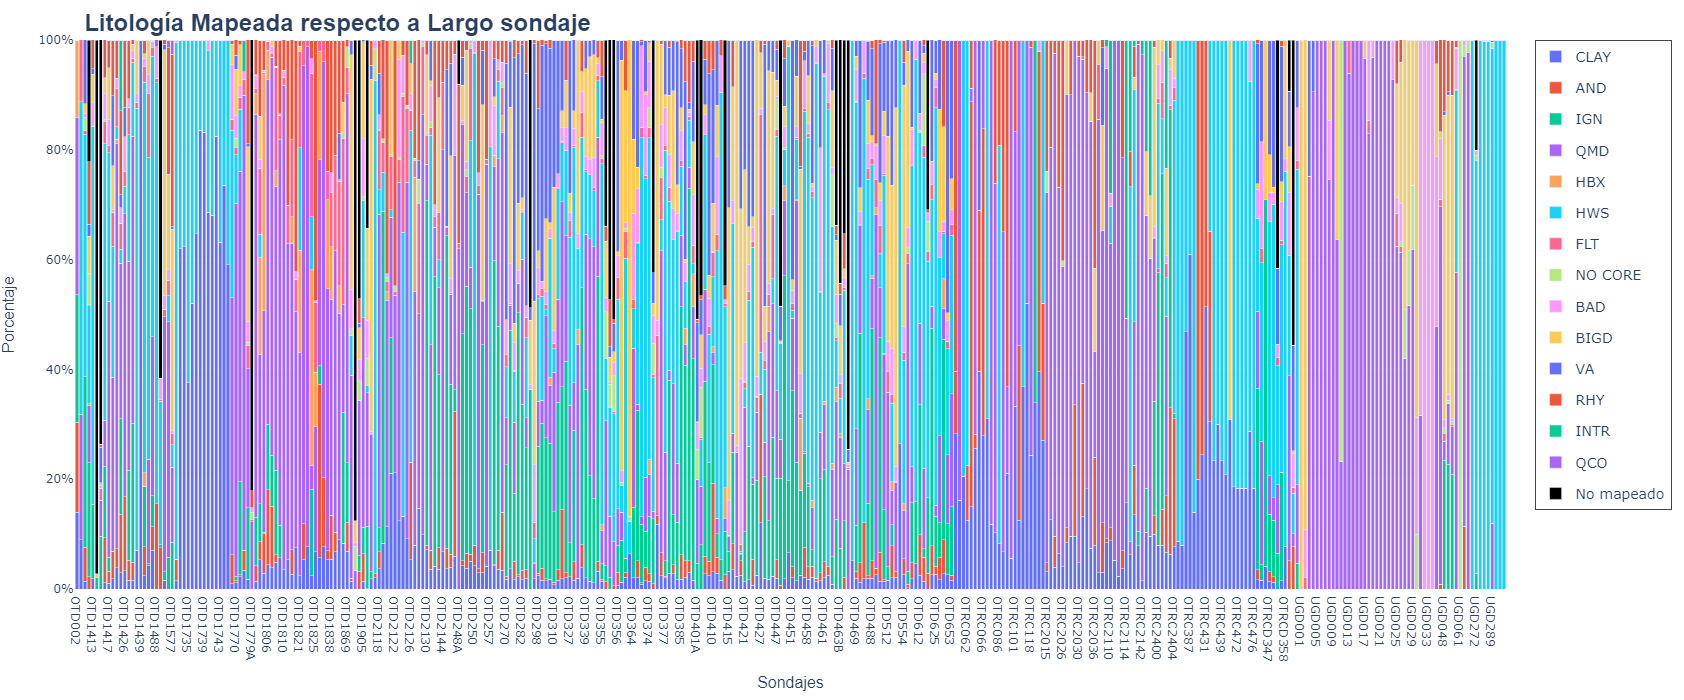

In [25]:
total_drill = np.array([collar_raw.loc[collar_raw.HOLEID == h, 'DEPTH'].values[0] for h in litologia.holeid.unique()])
fig = go.Figure()
for lith in litologia.mlith.unique():
    mlith = [litologia[(litologia['holeid'] == h) & (litologia['mlith'] == lith)]['Largo'].sum() for h in litologia.holeid.unique()]
    fig.add_trace(go.Bar(x=litologia.holeid.unique(), y=np.round((mlith/total_drill)*100, 2), legendgroup=f"{lith}", name=f'{lith}'))
fig.add_trace(go.Bar(x=litologia.holeid.unique(), y=np.round((total_drill-mapeado_drill)*100/total_drill, 2), legendgroup="No mapeado", name='No mapeado', marker_color='black', marker_opacity=1.0))
fig.update_layout(
    legend = {
        'font': {
            'size': 14
        },
        'borderwidth':1
    },
    title={
        "text": "<b>Litología Mapeada respecto a Largo sondaje</b>",
        "font": {
            "family": "Helvetica",
            "size": 24,
        },
        'y': 0.98
    },
    xaxis={
        'title': {
            'text': f"Sondajes",
            'font': {
                "family": "Helvetica",
                'size': 16,
            }
        },
    },
    yaxis={
        'title': {
            'text': 'Porcentaje',
            'font': {
                "family": "Helvetica",
                'size': 16,
            }
        },
        'ticksuffix': '%',
        'range': [0, 100]
    },
    barmode='stack',
    height = 700,
    width = 1650,
    margin=dict(
            t=40,
            l=20,
            r=20,
            b=20)
)
fig.show()

## Vista base de datos `Mineralizacion`

In [26]:
mineralizacion_raw.head()

HOLEID  GEOLFROM  GEOLTO  SulphChalcocite  SulphChalcopyrite  \
0   OTD006      90.0  100.00              0.0                0.0   
1  OTD1155     654.0  660.20              0.0                0.0   
2  OTD1155     664.1  666.35              0.0                0.0   
3  OTD1155     697.0  711.50              0.0                0.0   
4  OTD1155     828.0  830.00              0.0                0.0   

   SulphChrysocolla  SulphCovellite  SulphEnargite  SulphGalena  SulphGreenCu  \
0                 0             0.0            0.0          0.0             0   
1                 0             0.0            0.0          0.0             0   
2                 0             0.0            0.0          0.0             0   
3                 0             0.0            0.0          0.0             0   
4                 0             0.0            0.0          0.0             0   

   SulphMolybdenite  SulphNativeCu  SulphNeotocite  SulphPyrite  \
0               0.0              0               0        100.0   
1               0.0              0               0         -1.0   
2               0.0              0               0         -1.0   
3               0.0              0               0         -1.0   
4               0.0              0               0         -1.0   

   SulphPyrrhotite  SulphSphalerite  TotSulphide_pct  SulphBornite  \
0              0.0              0.0              0.5           0.0   
1              0.0              0.0              0.0           0.0   
2              0.0              0.0              0.0           0.0   
3              0.0              0.0              0.0           0.0   
4              0.0              0.0              0.0           0.0   

   SulphMagnetite  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

## Informacion respecto a las variables

In [27]:
mineralizacion_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36338 entries, 0 to 36337
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HOLEID             36338 non-null  object 
 1   GEOLFROM           36338 non-null  float64
 2   GEOLTO             36338 non-null  float64
 3   SulphChalcocite    29425 non-null  float64
 4   SulphChalcopyrite  33900 non-null  float64
 5   SulphChrysocolla   36338 non-null  int64  
 6   SulphCovellite     29351 non-null  float64
 7   SulphEnargite      29351 non-null  float64
 8   SulphGalena        29353 non-null  float64
 9   SulphGreenCu       36338 non-null  int64  
 10  SulphMolybdenite   30253 non-null  float64
 11  SulphNativeCu      36338 non-null  int64  
 12  SulphNeotocite     36338 non-null  int64  
 13  SulphPyrite        34189 non-null  float64
 14  SulphPyrrhotite    29342 non-null  float64
 15  SulphSphalerite    29347 non-null  float64
 16  TotSulphide_pct    342

## Análisis estadístico inicial

In [28]:
mineralizacion_raw.describe(include='all').T

count unique      top freq        mean         std   min  \
HOLEID               36338    291  OTD1770  635         NaN         NaN   NaN   
GEOLFROM           36338.0    NaN      NaN  NaN  597.599794  352.056056   0.0   
GEOLTO             36338.0    NaN      NaN  NaN  600.028768  351.653693  0.08   
SulphChalcocite    29425.0    NaN      NaN  NaN    0.642209    4.151223  -1.0   
SulphChalcopyrite  33900.0    NaN      NaN  NaN   32.373136   27.947338  -1.0   
SulphChrysocolla   36338.0    NaN      NaN  NaN     0.00011    0.010491   0.0   
SulphCovellite     29351.0    NaN      NaN  NaN    0.109962     1.69491  -1.0   
SulphEnargite      29351.0    NaN      NaN  NaN     0.69509    4.339613  -1.0   
SulphGalena        29353.0    NaN      NaN  NaN     0.00109    0.084174  -1.0   
SulphGreenCu       36338.0    NaN      NaN  NaN    0.001293    0.035941   0.0   
SulphMolybdenite   30253.0    NaN      NaN  NaN    0.004707    0.735236  -1.0   
SulphNativeCu      36338.0    NaN      NaN  NaN     0.00011    0.010491   0.0   
SulphNeotocite     36338.0    NaN      NaN  NaN    0.001403    0.037437   0.0   
SulphPyrite        34189.0    NaN      NaN  NaN    52.38121   32.773887  -1.0   
SulphPyrrhotite    29342.0    NaN      NaN  NaN         0.0         0.0   0.0   
SulphSphalerite    29347.0    NaN      NaN  NaN    0.003271    0.527112  -1.0   
TotSulphide_pct    34214.0    NaN      NaN  NaN    3.065293    1.956095  -1.0   
SulphBornite       29959.0    NaN      NaN  NaN    8.993625   19.978896  -1.0   
SulphMagnetite     29358.0    NaN      NaN  NaN    0.037503    0.189993   0.0   

                     25%    50%    75%     max  
HOLEID               NaN    NaN    NaN     NaN  
GEOLFROM           328.0  566.0  808.0  2008.0  
GEOLTO             330.0  568.0  810.0  2010.3  
SulphChalcocite      0.0    0.0    0.0   100.0  
SulphChalcopyrite   10.0   30.0   50.0   100.0  
SulphChrysocolla     0.0    0.0    0.0     1.0  
SulphCovellite       0.0    0.0    0.0    70.0  
SulphEnargite        0.0    0.0    0.0   100.0  
SulphGalena          0.0    0.0    0.0     5.0  
SulphGreenCu         0.0    0.0    0.0     1.0  
SulphMolybdenite     0.0    0.0    0.0    30.0  
SulphNativeCu        0.0    0.0    0.0     1.0  
SulphNeotocite       0.0    0.0    0.0     1.0  
SulphPyrite         20.0   60.0   80.0   100.0  
SulphPyrrhotite      0.0    0.0    0.0     0.0  
SulphSphalerite      0.0    0.0    0.0    90.0  
TotSulphide_pct      2.0    3.0    4.0    60.0  
SulphBornite         0.0    0.0   10.0   100.0  
SulphMagnetite       0.0    0.0    0.0     1.0

## Variable categorica que indique si muestra cumple con validacion de 100% minerales

In [29]:
mineralizacion = mineralizacion_raw.copy()
# Creamos una variable categorica check, que indique Total, Null o Not 100
mineral_list= list(mineralizacion.columns[3:16]) + list(mineralizacion.columns[17:19])
# Reemplazamos todos los -1 por 0 o por nan (Por mientras)
mineralizacion = mineralizacion.replace(-1, np.nan)
mineralizacion['Total'] = mineralizacion[mineral_list].sum(axis=1).astype(np.float32)
mineralizacion['Check'] = mineralizacion.apply(lambda c: 'Round' if c['Total'] == 100.0 else ('No Data' if c['Total'] < 0 else 'Null'), axis=1)
mineralizacion['Largo'] = mineralizacion['GEOLTO'] - mineralizacion['GEOLFROM']
mineralizacion

HOLEID  GEOLFROM  GEOLTO  SulphChalcocite  SulphChalcopyrite  \
0       OTD006      90.0  100.00              0.0                0.0   
1      OTD1155     654.0  660.20              0.0                0.0   
2      OTD1155     664.1  666.35              0.0                0.0   
3      OTD1155     697.0  711.50              0.0                0.0   
4      OTD1155     828.0  830.00              0.0                0.0   
...        ...       ...     ...              ...                ...   
36333   UGD292     194.0  197.00              NaN                NaN   
36334   UGD292     197.0  200.00              NaN                NaN   
36335   UGD292     200.0  203.00              NaN                NaN   
36336   UGD292     203.0  206.00              NaN                NaN   
36337   UGD292     206.0  210.00              NaN                NaN   

       SulphChrysocolla  SulphCovellite  SulphEnargite  SulphGalena  \
0                     0             0.0            0.0          0.0   
1                     0             0.0            0.0          0.0   
2                     0             0.0            0.0          0.0   
3                     0             0.0            0.0          0.0   
4                     0             0.0            0.0          0.0   
...                 ...             ...            ...          ...   
36333                 0             NaN            NaN          NaN   
36334                 0             NaN            NaN          NaN   
36335                 0             NaN            NaN          NaN   
36336                 0             NaN            NaN          NaN   
36337                 0             NaN            NaN          NaN   

       SulphGreenCu  ...  SulphNeotocite  SulphPyrite  SulphPyrrhotite  \
0                 0  ...               0        100.0              0.0   
1                 0  ...               0          NaN              0.0   
2                 0  ...               0          NaN              0.0   
3                 0  ...               0          NaN              0.0   
4                 0  ...               0          NaN              0.0   
...             ...  ...             ...          ...              ...   
36333             0  ...               0          NaN              NaN   
36334             0  ...               0          NaN              NaN   
36335             0  ...               0          NaN              NaN   
36336             0  ...               0          NaN              NaN   
36337             0  ...               0          NaN              NaN   

       SulphSphalerite  TotSulphide_pct  SulphBornite  SulphMagnetite  Total  \
0                  0.0              0.5           0.0             0.0  100.0   
1                  0.0              0.0           0.0             0.0    0.0   
2                  0.0              0.0           0.0             0.0    0.0   
3                  0.0              0.0           0.0             0.0    0.0   
4                  0.0              0.0           0.0             0.0    0.0   
...                ...              ...           ...             ...    ...   
36333              NaN              NaN           NaN             NaN    0.0   
36334              NaN              NaN           NaN             NaN    0.0   
36335              NaN              NaN           NaN             NaN    0.0   
36336              NaN              NaN           NaN             NaN    0.0   
36337              NaN              NaN           NaN             NaN    0.0   

       Check  Largo  
0      Round  10.00  
1       Null   6.20  
2       Null   2.25  
3       Null  14.50  
4       Null   2.00  
...      ...    ...  
36333   Null   3.00  
36334   Null   3.00  
36335   Null   3.00  
36336   Null   3.00  
36337   Null   4.00  

[36338 rows x 22 columns]

In [30]:
# Obtener valores nulos (-1)
mineralizacion_raw[mineralizacion_raw[mineral_list] < 0].dropna(how='all').shape[0]

12016

In [31]:
# Cuantos valores no suman 100 y cuales son
np.unique(mineralizacion[mineralizacion['Check'] == 'Null']['Total'], return_counts=True)

(array([  0.,   1.,   2.,  99., 101., 102., 105.], dtype=float32),
 array([4092,   64,   33,    1, 1072,    3,   17], dtype=int64))

De los <b>36338</b> registros, hay <b>31056</b> que suman 100% de mineralización. <br>De los <b>5282</b> que no suman 100%, hay:
* 4092 que suman 0% (Sin mineralización)
* 64 que suman 1% de mineralización (`SulphGreenCu`, `SulphNativeCu`, `SulphNeotocite` y `SulphMagnetite`)
* 33 que suman 2% de mineralización (`SulphChrysocolla`, `SulphGreenCu`, `SulphNeotocite`)
* 1 que suma 99% de mineralizacion (20% de `SulphChalcopyrite` y 79% de `SulphPyrite`)
* 1072 que suman 101% de mineralizacion (`SulphChrysocolla`, `SulphGreenCu`, `SulphMolybdenite`, `SulphNativeCu`, `SulphMagnetite` >)
* 3 que suman 102% (`SulphChrysocolla`, `SulphGreenCu`, `SulphNeotocite`)
* 17 que suman 105% (`SulphMolybdenite` presenta 5% en todos)

En la base de datos inicial hay <b>12016</b> registros que contiene uno o mas valores -1, que se consideran missing values

In [32]:
n_mapeado = np.array([mineralizacion[(mineralizacion.HOLEID == h) & (mineralizacion.Check == 'Round')]['Check'].count() for h in mineralizacion.HOLEID.unique()])
n_mapeado_mal = np.array([mineralizacion[(mineralizacion.HOLEID == h) & (mineralizacion.Check == 'Null')]['Check'].count() for h in mineralizacion.HOLEID.unique()])
total_n = np.array([len(mineralizacion[mineralizacion.HOLEID == h]) for h in mineralizacion.HOLEID.unique()])

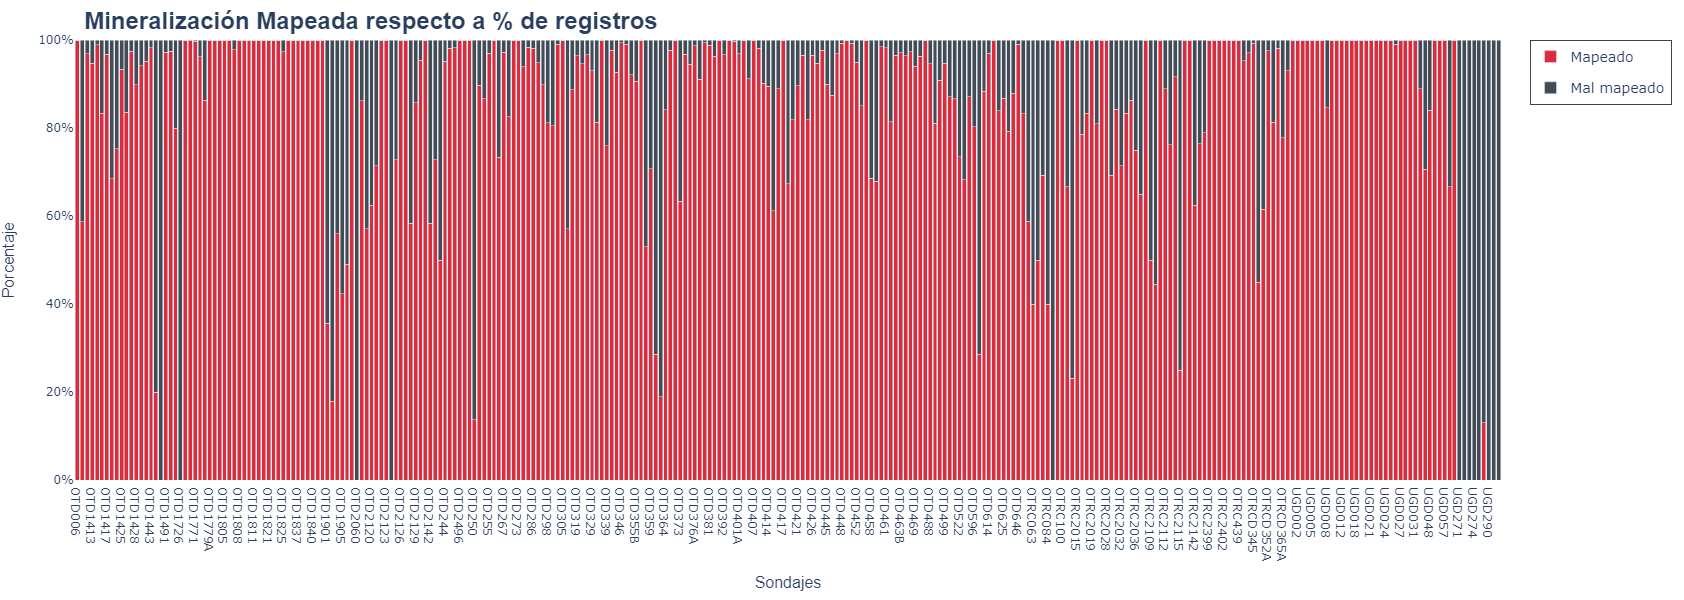

In [33]:
fig = go.Figure()
fig.add_trace(go.Bar(x=mineralizacion.HOLEID.unique(), y=np.round(n_mapeado*100/total_n, 2), legendgroup="Mapeado", name='Mapeado', marker_color='#db2c3c', marker_opacity=1.0))
fig.add_trace(go.Bar(x=mineralizacion.HOLEID.unique(), y=np.round(n_mapeado_mal*100/total_n, 2), legendgroup="Mal mapeado", name='Mal mapeado', marker_color='#434b53', marker_opacity=1.0))
fig.update_layout(
    title={
        "text": "<b>Mineralización Mapeada respecto a % de registros</b>",
        "font": {
            "family": "Helvetica",
            "size": 24,
        },
        'y': 0.98
    },
    xaxis={
        'title': {
            'text': f"Sondajes",
            'font': {
                "family": "Helvetica",
                'size': 16,
            }
        },
    },
    yaxis={
        'title': {
            'text': 'Porcentaje',
            'font': {
                "family": "Helvetica",
                'size': 16,
            }
        },
        'ticksuffix': '%',
        'range': [0, 100]
    },
    barmode='stack',
    height = 600,
    width = 1600,
    margin=dict(
            t=40,
            l=20,
            r=20,
            b=20),        
    legend = {
        'font': {
            'size': 14
        },
        'borderwidth':1
    },
)
fig.show()

In [34]:
mapeado_drill = np.array([mineralizacion[(mineralizacion.HOLEID == h) & (mineralizacion.Check == 'Round')]['Largo'].sum() for h in mineralizacion.HOLEID.unique()])
mal_mapeado_drill = np.array([mineralizacion[(mineralizacion.HOLEID == h) & (mineralizacion.Check == 'Null')]['Largo'].sum() for h in mineralizacion.HOLEID.unique()])
total_drill = np.array([collar_raw.loc[collar_raw.HOLEID == h, 'DEPTH'].values[0] for h in mineralizacion.HOLEID.unique()])
no_mapeado_drill = total_drill - mal_mapeado_drill - mapeado_drill

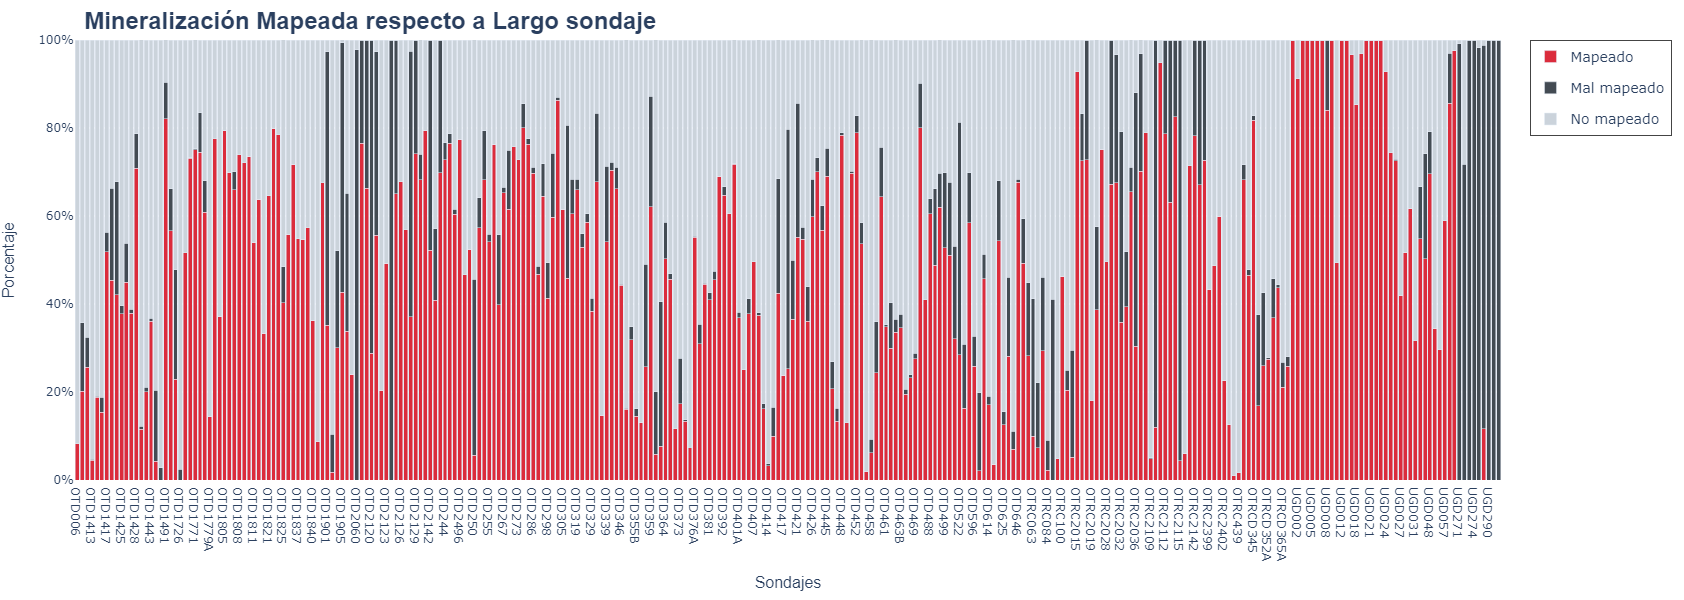

In [35]:
fig = go.Figure()
fig.add_trace(go.Bar(x=mineralizacion.HOLEID.unique(), y=np.round(mapeado_drill*100/total_drill, 2), legendgroup="Mapeado", name='Mapeado', marker_color='#db2c3c', marker_opacity=1.0))
fig.add_trace(go.Bar(x=mineralizacion.HOLEID.unique(), y=np.round(mal_mapeado_drill*100/total_drill, 2), legendgroup="Mal mapeado", name='Mal mapeado', marker_color='#434b53', marker_opacity=1.0))
fig.add_trace(go.Bar(x=mineralizacion.HOLEID.unique(), y=np.round(no_mapeado_drill*100/total_drill, 2), legendgroup="No mapeado", name='No mapeado', marker_color='#cbd3db', marker_opacity=1.0))
fig.update_layout(
    title={
        "text": "<b>Mineralización Mapeada respecto a Largo sondaje</b>",
        "font": {
            "family": "Helvetica",
            "size": 24,
        },
        'y': 0.98
    },
    xaxis={
        'title': {
            'text': f"Sondajes",
            'font': {
                "family": "Helvetica",
                'size': 16,
            }
        },
    },
    yaxis={
        'title': {
            'text': 'Porcentaje',
            'font': {
                "family": "Helvetica",
                'size': 16,
            }
        },
        'ticksuffix': '%',
        'range': [0, 100]
    },
    barmode='stack',
    height = 600,
    width = 1650,
    margin=dict(
            t=40,
            l=20,
            r=20,
            b=20),        
    legend = {
        'font': {
            'size': 14
        },
        'borderwidth':1
    },
)
fig.show()

In [36]:
# Base de datos con toda esta informacion
mineralizacion_mapeada = pd.DataFrame({
    'HOLEID': mineralizacion.HOLEID.unique(),
    'DrillMapeado': mapeado_drill, 
    'DrillNoMapeado': no_mapeado_drill,
    'DrillMalMapeado': mal_mapeado_drill, 
    'NumMapeados': n_mapeado, 
    'NumMalMapeado': n_mapeado_mal,
})
mineralizacion_mapeada.head()

HOLEID  DrillMapeado  DrillNoMapeado  DrillMalMapeado  NumMapeados  \
0    OTD006         10.00           111.4             0.00            1   
1   OTD1155        258.15           822.2           199.55          129   
2  OTD1155A        350.00           922.5            92.00          126   
3   OTD1413         38.80           823.2             1.60           18   
4  OTD1413B        192.00           824.0             2.00           96   

   NumMalMapeado  
0              0  
1             91  
2              4  
3              1  
4              1

## Vista base de datos `Assay`

In [37]:
assay_raw.head()

HOLEID  SAMPLEID  SAMPFROM  SAMPTO SAMPLETYPE  Au_ppm  Ag_ppm  Cu_pct  \
0  OTD002  OT2/97-1       0.0     2.0   HALFCORE   0.015     NaN    0.03   
1  OTD002  OT2/97-2       2.0     4.0   HALFCORE   0.015     NaN    0.02   
2  OTD002  OT2/97-3       4.0     6.0   HALFCORE   0.015     NaN    0.01   
3  OTD002  OT2/97-4       6.0     8.0   HALFCORE   0.015     NaN    0.01   
4  OTD002  OT2/97-5       8.0    10.0   HALFCORE   0.015     NaN    0.01   

   As_ppm  C_pct  F_ppm  Fe_pct  Mo_ppm  S_pct  Pb_ppm  Zn_ppm  Cd_ppm  Hg_ppm  
0     NaN    NaN    NaN     NaN     NaN    NaN     NaN     NaN     NaN     NaN  
1     NaN    NaN    NaN     NaN     NaN    NaN     NaN     NaN     NaN     NaN  
2     NaN    NaN    NaN     NaN     NaN    NaN     NaN     NaN     NaN     NaN  
3     NaN    NaN    NaN     NaN     NaN    NaN     NaN     NaN     NaN     NaN  
4     NaN    NaN    NaN     NaN     NaN    NaN     NaN     NaN     NaN     NaN

## Informacion respecto a las variables

In [38]:
assay_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45530 entries, 0 to 45529
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HOLEID      45530 non-null  object 
 1   SAMPLEID    45530 non-null  object 
 2   SAMPFROM    45530 non-null  float64
 3   SAMPTO      45530 non-null  float64
 4   SAMPLETYPE  45530 non-null  object 
 5   Au_ppm      42674 non-null  float64
 6   Ag_ppm      21822 non-null  float64
 7   Cu_pct      43426 non-null  float64
 8   As_ppm      40648 non-null  float64
 9   C_pct       1443 non-null   float64
 10  F_ppm       4647 non-null   float64
 11  Fe_pct      11733 non-null  float64
 12  Mo_ppm      41575 non-null  float64
 13  S_pct       11760 non-null  float64
 14  Pb_ppm      11733 non-null  float64
 15  Zn_ppm      11733 non-null  float64
 16  Cd_ppm      11733 non-null  float64
 17  Hg_ppm      915 non-null    float64
dtypes: float64(15), object(3)
memory usage: 6.3+ MB


## Análisis estadístico inicial

In [39]:
assay_raw.describe(include='all').T

count unique       top   freq         mean          std  \
HOLEID        45530    311   OTD1770    607          NaN          NaN   
SAMPLEID      45530  45530  OT2/97-1      1          NaN          NaN   
SAMPFROM    45530.0    NaN       NaN    NaN   479.081064   365.530279   
SAMPTO      45530.0    NaN       NaN    NaN   482.211358   365.252253   
SAMPLETYPE    45530      9  HALFCORE  32499          NaN          NaN   
Au_ppm      42674.0    NaN       NaN    NaN     0.085533     0.247469   
Ag_ppm      21822.0    NaN       NaN    NaN      1.24569     2.101612   
Cu_pct      43426.0    NaN       NaN    NaN     0.576393     0.784369   
As_ppm      40648.0    NaN       NaN    NaN   137.091343    357.86511   
C_pct        1443.0    NaN       NaN    NaN     0.328923     0.477491   
F_ppm        4647.0    NaN       NaN    NaN  1912.192813  2011.561897   
Fe_pct      11733.0    NaN       NaN    NaN     4.231434     1.972153   
Mo_ppm      41575.0    NaN       NaN    NaN    44.515746     80.57951   
S_pct       11760.0    NaN       NaN    NaN     2.327255     2.700707   
Pb_ppm      11733.0    NaN       NaN    NaN    68.121252   121.836241   
Zn_ppm      11733.0    NaN       NaN    NaN   233.756857   468.521042   
Cd_ppm      11733.0    NaN       NaN    NaN     0.632823     1.824884   
Hg_ppm        915.0    NaN       NaN    NaN     0.101763     0.221707   

                min     25%     50%     75%      max  
HOLEID          NaN     NaN     NaN     NaN      NaN  
SAMPLEID        NaN     NaN     NaN     NaN      NaN  
SAMPFROM        0.0   174.0   426.0   710.0   2010.0  
SAMPTO          0.7   178.0   430.0   714.0   2011.0  
SAMPLETYPE      NaN     NaN     NaN     NaN      NaN  
Au_ppm       0.0002    0.01   0.038   0.084     26.8  
Ag_ppm        0.001   0.433    0.58    1.45     90.8  
Cu_pct      0.00021  0.0611   0.319    0.82     21.5  
As_ppm          0.5    50.0    50.0    73.4  15200.0  
C_pct         0.005    0.01    0.07     0.5     3.46  
F_ppm          10.0  1180.0  1600.0  2200.0  46500.0  
Fe_pct        0.158    2.92    3.93    5.29     18.6  
Mo_ppm         0.06    5.27    22.0    55.0   6080.0  
S_pct        0.0025     0.2    1.21    3.76     21.3  
Pb_ppm         1.91   14.85    33.2    80.8   5040.0  
Zn_ppm          1.0    53.6   103.0   241.0  10000.0  
Cd_ppm       0.0025   0.075   0.171    0.52     64.7  
Hg_ppm        0.002   0.015   0.044  0.1065     4.24

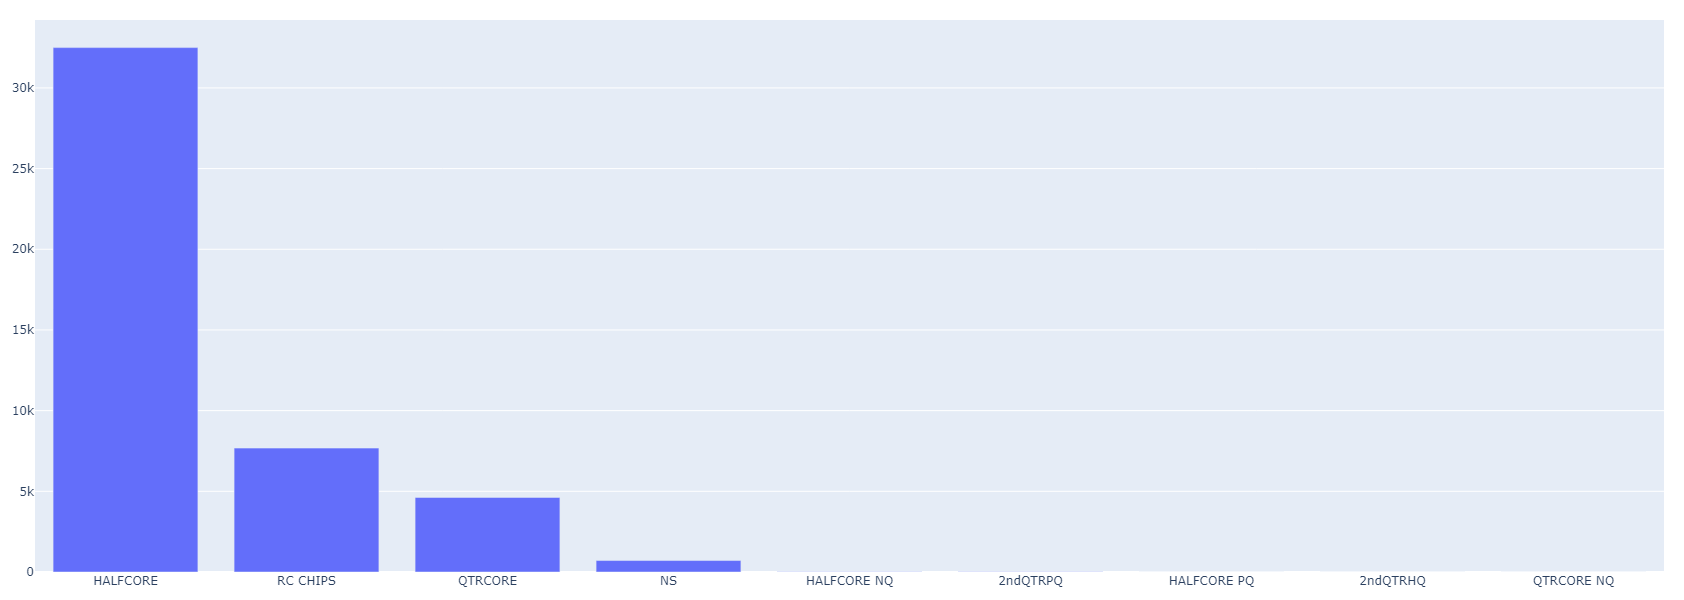

In [40]:
categorical_bar_plus(df=assay_raw, target='SAMPLETYPE', figsize=(1000, 600))

## Vista base de datos `Collar`

In [41]:
collar_raw.head()

HOLEID         EAST        NORTH         RL   DEPTH  STARTDATE    ENDDATE
0    OTD002  650356.7700  4764995.280  1176.9800    98.9  25-Mar-98  10-Apr-98
1    OTD006  651026.3450  4764988.905  1164.5140   121.4  26-Mar-98  11-Apr-98
2   OTD1155  651796.2959  4764999.169  1157.7008  1279.9  12-Jul-05  27-Aug-05
3  OTD1155A  651796.2959  4764999.169  1157.7008  1364.5  25-Sep-05  18-Nov-05
4   OTD1413  651921.4300  4766474.210  1161.7600   863.6   2-Oct-06  24-Oct-06

## Informacion respecto a las variables

In [42]:
collar_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HOLEID     360 non-null    object 
 1   EAST       360 non-null    float64
 2   NORTH      360 non-null    float64
 3   RL         360 non-null    float64
 4   DEPTH      360 non-null    float64
 5   STARTDATE  360 non-null    object 
 6   ENDDATE    357 non-null    object 
dtypes: float64(4), object(3)
memory usage: 19.8+ KB


## Análisis estadístico inicial

In [43]:
collar_raw.describe(include='all').T

count unique        top freq            mean         std  \
HOLEID       360    360     OTD002    1             NaN         NaN   
EAST       360.0    NaN        NaN  NaN   651099.268107  575.043418   
NORTH      360.0    NaN        NaN  NaN  4765661.616589  597.735307   
RL         360.0    NaN        NaN  NaN      1020.76307  376.664973   
DEPTH      360.0    NaN        NaN  NaN      495.766389  440.577369   
STARTDATE    360    297  12-Jun-03    5             NaN         NaN   
ENDDATE      357    300  11-Jun-03    6             NaN         NaN   

                  min           25%          50%            75%        max  
HOLEID            NaN           NaN          NaN            NaN        NaN  
EAST       650059.948      650540.0   651199.325  651506.003125  652263.95  
NORTH      4764755.91  4765062.4675  4765582.905    4766285.388  4766497.0  
RL             -138.0    1160.21625     1162.536     1169.87075     1181.0  
DEPTH             7.2        98.175       300.75        842.775     2011.0  
STARTDATE         NaN           NaN          NaN            NaN        NaN  
ENDDATE           NaN           NaN          NaN            NaN        NaN

In [44]:
collar_raw[collar_raw.RL < 0]

HOLEID         EAST        NORTH        RL    DEPTH  STARTDATE    ENDDATE
327  UGD020  651186.5000  4766336.050 -134.5000     9.17  18-Nov-07  18-Nov-07
328  UGD021  651187.9500  4766337.700 -134.5000    11.40  25-Nov-07  26-Nov-07
329  UGD022  651186.5000  4766337.700 -134.5000     8.40  25-Nov-07  25-Nov-07
330  UGD023  651188.8000  4766337.700 -134.5000     9.00  25-Nov-07  25-Nov-07
331  UGD024  651228.8400  4766294.330 -136.7800    45.50  10-Feb-08  10-Feb-08
332  UGD025  651228.8400  4766293.160 -136.3500    50.00  10-Feb-08  10-Feb-08
333  UGD026  651271.7495  4766283.836 -136.2724   604.45  20-May-08  13-Jul-08
334  UGD027  651346.3328  4766366.797 -136.9460    22.60  18-Jul-07  18-Jul-07
335  UGD028  651346.4955  4766366.747 -136.9660    20.30  22-Jul-08  22-Jul-08
336  UGD029  651346.5624  4766366.727 -136.9660    17.00  18-Jul-08  18-Jul-08
337  UGD030  651349.4489  4766359.542 -136.8880    10.00  22-Jul-08  22-Jul-08
338  UGD031  651306.1100  4766382.960 -135.9647    13.76  24-Jul-08  24-Jul-08
339  UGD032  651305.9325  4766383.431 -135.8669    13.30  23-Jul-08  23-Jul-08
340  UGD033  651304.6800  4766385.250 -135.8245    11.15  28-Jul-08  28-Jul-08
341  UGD034  651305.3400  4766384.870 -135.8669    11.88  28-Jul-08  28-Jul-08
342  UGD035  651305.1358  4766384.921 -135.5810   123.30   1-Aug-08  16-Aug-08
343  UGD036  651300.5000  4766384.000 -135.8000  1010.60  22-Nov-09  28-Jan-10
347  UGD057  651222.8300  4766460.000 -138.0000   589.00  26-Oct-10   2-Nov-10
349  UGD159  651159.2690  4766334.520 -137.6580    38.20  12-Sep-17  13-Sep-17
350  UGD160  651124.9650  4766359.024 -137.6300    43.25  15-Sep-17  17-Sep-17